In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv(r"D:\Machine_Learning\Linear_Regression\Datasets\income.data.csv")
data.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [42]:
data.tail()

,Unnamed: 0,income,happiness
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664
497,498,4.530545,3.710193


In [43]:
data.shape

(498, 3)

In [44]:
max = data['income'].max()
data[data['income'] == max]

,Unnamed: 0,income,happiness
439,440,7.481521,6.196296


In [45]:
data['happiness'].max()

np.float64(6.86338795095807)

In [46]:
data.columns

Index(['Unnamed: 0', 'income', 'happiness'], dtype='object')

In [47]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [49]:
data.isnull().sum()

income       0
happiness    0
dtype: int64

In [50]:
data.duplicated().sum()

np.int64(0)

In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


income


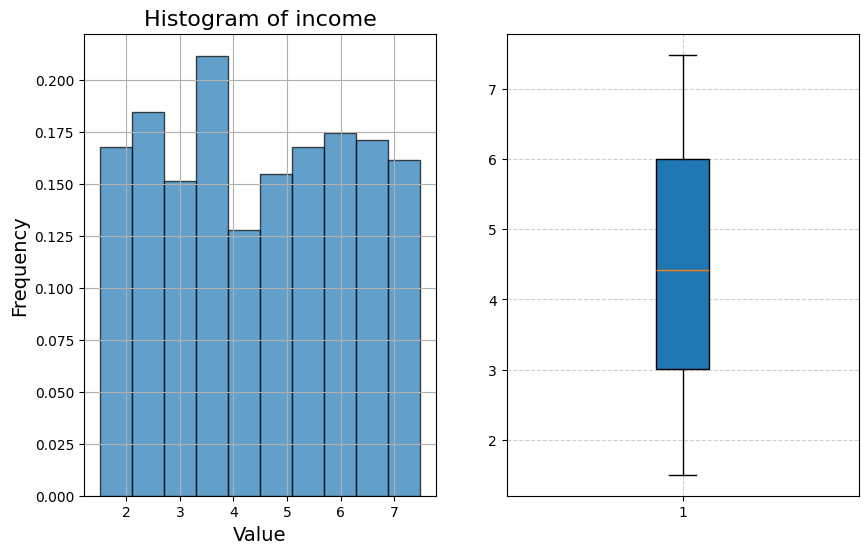

happiness


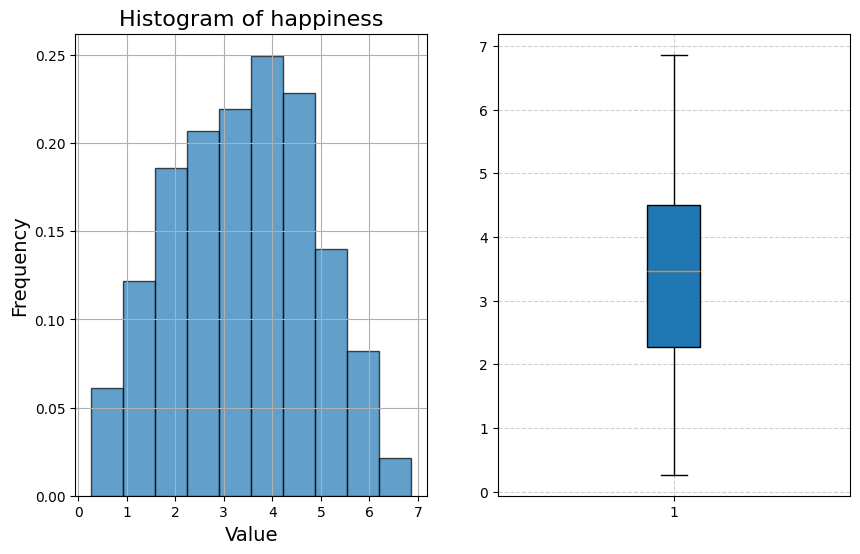

In [52]:
for i in data.columns:
    print(i)

    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    data[i].hist(edgecolor='black', alpha=0.7, orientation='vertical', density=True)
    plt.title(f'Histogram of {i}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.subplot(1, 2, 2)
    plt.boxplot(data[i], vert=True, patch_artist=True)  # vert=False for horizontal boxplot

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

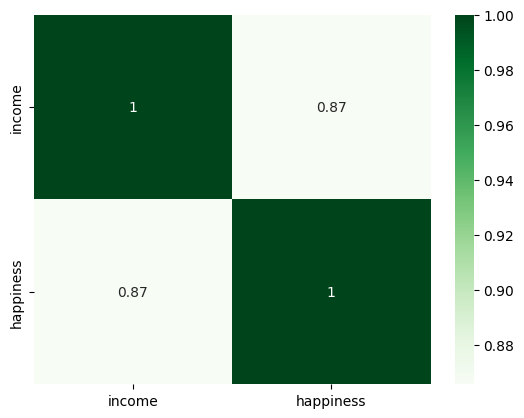

In [53]:
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap="Greens")
plt.show()

In [54]:
# Assuming you have a DataFrame named 'data' with columns 'income' and 'happiness'
X = data['income']
y = data['happiness']

In [71]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Fit the linear regression model
model = sm.OLS(y_train,X_train).fit()

In [73]:
# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1299.
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          4.15e-127
Time:                        13:23:31   Log-Likelihood:                -424.82
No. Observations:                 398   AIC:                             853.6
Df Residuals:                     396   BIC:                             861.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1417      0.097      1.465      0.1

In [74]:
# Predicted values based on the model
y_pred = model.predict(X_test)
y_pred

487    3.217530
73     2.217923
231    3.202803
175    1.790207
237    1.743947
         ...   
247    4.464266
383    3.657784
19     1.587092
321    3.620843
331    4.671727
Length: 100, dtype: float64

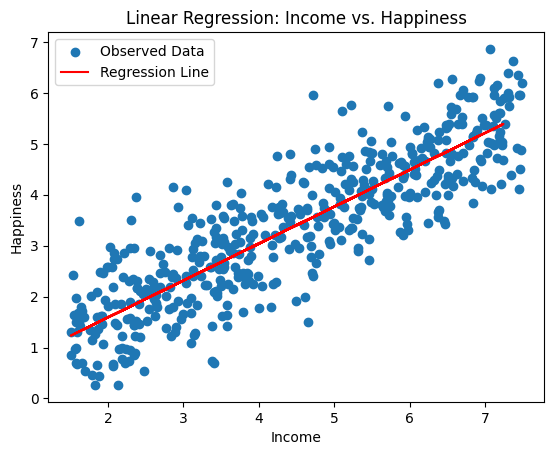

In [76]:
# Scatter plot of the data points
plt.scatter(data['income'], data['happiness'], label='Observed Data')

# Plot the regression line
plt.plot(X_test['income'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Linear Regression: Income vs. Happiness')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [61]:
income = float(input("Enter the income: "))
print(income)
new_data_point = [1,income]
pridicted_value = model.predict(new_data_point)
pridicted_value[0]

5.0


np.float64(3.7733979576052166)

Using Sklear Method

In [62]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
model.coef_

array([0.       , 0.7247687])

In [65]:
model.intercept_

np.float64(0.1417038722371209)

In [66]:
X_test['income']

487    4.243873
73     2.864664
231    4.223554
175    2.274523
237    2.210696
         ...   
247    5.964058
383    4.851314
19     1.994275
321    4.800344
331    6.250302
Name: income, Length: 100, dtype: float64

In [67]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([3.21752987, 2.21792257, 3.20280332, 1.79020704, 1.74394749,
       2.39018719, 4.44664262, 4.86010664, 1.89050708, 3.50456863,
       4.09833273, 2.4318678 , 2.85594355, 3.54519132, 2.78796716,
       1.80768864, 2.52124048, 5.16673969, 2.45094439, 3.996441  ,
       1.83486036, 2.72998006, 2.63135811, 1.23340488, 4.61112137,
       1.72884986, 2.46409207, 5.3782968 , 4.21884267, 4.12789401,
       1.34529138, 3.72063824, 2.83545189, 3.71043375, 4.0008309 ,
       4.01012804, 1.2713695 , 2.47646914, 1.31859325, 2.24910091,
       5.35598486, 4.42244764, 5.0893214 , 4.83614181, 2.94122983,
       2.15161714, 1.6263909 , 3.16872379, 2.67722482, 1.46401227,
       4.0291672 , 2.98869745, 5.14038236, 3.7164133 , 3.58847209,
       3.3425148 , 3.54804131, 3.94616611, 4.93059286, 3.81954393,
       4.89818897, 1.55970378, 5.09603988, 2.34495858, 2.2134292 ,
       5.38998089, 4.72238072, 3.7692388 , 2.40771063, 5.32646295,
       4.52828042, 3.42736682, 3.04261746, 3.07258943, 1.94085

In [68]:
# Evaluate the model
import numpy as np
mse = mean_squared_error(y_test, y_pred) # Cost function
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) # cost function

# Print the evaluation metrics
print("Evaluation Metrics:")

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Evaluation Metrics:
Mean Squared Error (MSE): 0.59
Mean Absolute Error (MAE): 0.6270
Root Mean Squared Error (RMSE): 0.7682
R-squared (R²): 0.6663


#### **MSE**
- MSE measures the average squared difference between the actual target values and the predicted values.
- Lower values indicate better performance, but MSE is sensitive to outliers because errors are squared.

#### **MAE**
- MAE measures the average of the absolute differences between the actual and predicted values.
- lower values indicate better model performance

#### **R-squared (R²)**

- R^2 = 1-SSR/SST
- R-squared measures how well the model's predictions fit the actual data. It indicates the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

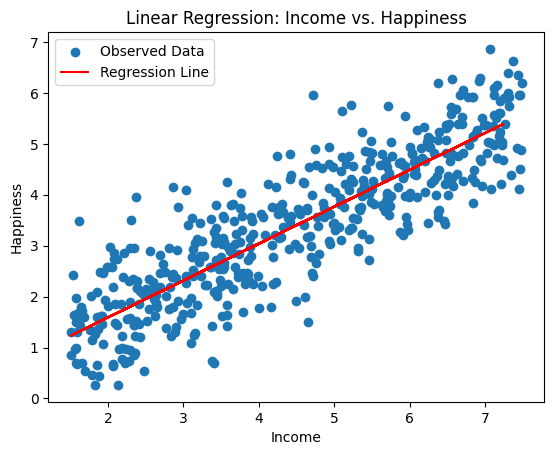

In [69]:
# Scatter plot of the data points
plt.scatter(data['income'], data['happiness'], label='Observed Data')

# Plot the regression line
plt.plot(X_test['income'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Linear Regression: Income vs. Happiness')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [70]:
new_data = [1, 7.5]
y_pred = model.predict([new_data])
print(f"Predicted value: {y_pred[0]}")

Predicted value: 5.577469134373413


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
